Dataset: https://www.azlyrics.com/c/coldplay.html

In [1]:
#imports
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
#I have consolidated the lyrics of coldplay discography.
tokenizer = Tokenizer()
data = open('coldplay.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens. ngrams of each line. 2,3....,max(words)
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
#last word in every n-gram sequence is the labelled variable
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)# one hot encoding

In [3]:
#sequential model
#using relu for hidden layers
#using softmax for the output layer as it is a multi classification problem
#using dropout on visible layer to overcome overfitting.
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           187200    
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 20, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 936)               94536     
_________________________________________________________________
dense_1 (Dense)              (None, 1872)              1754064   
Total params: 2,497,400
Trainable params: 2,497,400
Non-trainable params: 0
______________________________________________

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15825 samples
Epoch 1/100
15825/15825 [==============================] - 48s 3ms/sample - loss: 6.1709 - accuracy: 0.0379
Epoch 2/100
15825/15825 [==============================] - 41s 3ms/sample - loss: 5.6270 - accuracy: 0.0468
Epoch 3/100
15825/15825 [==============================] - 44s 3ms/sample - loss: 5.4062 - accuracy: 0.0555
Epoch 4/100
15825/15825 [==============================] - 51s 3ms/sample - loss: 5.2618 - accuracy: 0.0636
Epoch 5/100
15825/15825 [==============================] - 56s 4ms/sample - loss: 5.1291 - accuracy: 0.0753
Epoch 6/100
15825/15825 [==============================] - 57s 4ms/sample - loss: 4.9957 - accuracy: 0.0919
Epoch 7/100
15825/15825 [==============================] - 57s 4ms/sample - loss: 4.8618 - accuracy: 0.1155
Epoch 8/100
15825/15825 [==============================] - 57s 4ms/sample - loss: 4.7324 - accuracy: 0.1293
Epoch 9/100
15825/15825 [==============================] - 57s 4ms/sample - loss: 4.6170 - accuracy: 0.1482
Epoch

15825/15825 [==============================] - 69s 4ms/sample - loss: 1.6755 - accuracy: 0.6598
Epoch 77/100
15825/15825 [==============================] - 54s 3ms/sample - loss: 1.6523 - accuracy: 0.6639
Epoch 78/100
15825/15825 [==============================] - 64s 4ms/sample - loss: 1.6475 - accuracy: 0.6648
Epoch 79/100
15825/15825 [==============================] - 56s 4ms/sample - loss: 1.6324 - accuracy: 0.6653
Epoch 80/100
15825/15825 [==============================] - 62s 4ms/sample - loss: 1.6184 - accuracy: 0.6686
Epoch 81/100
15825/15825 [==============================] - 58s 4ms/sample - loss: 1.5964 - accuracy: 0.6737
Epoch 82/100
15825/15825 [==============================] - 55s 3ms/sample - loss: 1.5886 - accuracy: 0.6767
Epoch 83/100
15825/15825 [==============================] - 56s 4ms/sample - loss: 1.5648 - accuracy: 0.6817
Epoch 84/100
15825/15825 [==============================] - 59s 4ms/sample - loss: 1.5604 - accuracy: 0.6833
Epoch 85/100
15825/15825 [======

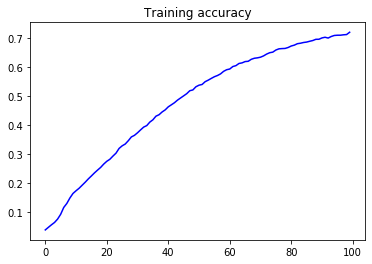

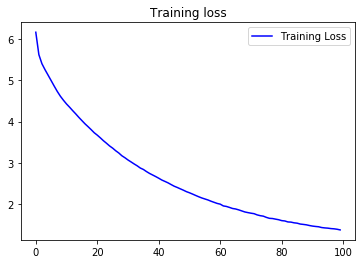

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
def generator(next_words,seed_text):
  
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    print(seed_text)

In [10]:
generator(200,"come together")

come together for you you feel like you can see this future with love you down from the pain just going streaming out turn future future with future and you precious said you'll wait everglow answer call grace chance one raise she spoken up your eyes i see it at i'm on your eyes and see it at i'm against the reign of blood thirst day close your eyes and only night call it up and you take ring only night she'd guide sun only night call sun love and future feels she'd say i don't night call sun realised answer space you run sun from it apart with me answer half future at future must go to say i tried to swim in your eyes and down at view prolly at sound k's grace close your part of call sound future work ring future feels draw the line for you ah lie and the days are done for sleeping this outcome heard future only precious everglow call or me everglow fall everglow everglow everglow call it love for future close into future call sound guide you does this people know how you you know wha

#### This is not the most accurate model for text prediction. But given the limitations of the dataset and the computational capacity of the local pc I would say this is a good start. We can try to scale it up and fine tune parameters to get a better model.